In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [3]:
df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [5]:
df_new=df.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01
1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01
2,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01
3,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01
4,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01


In [6]:
z = df_new["Wind_Speed"]

df_new = df_new.drop(labels=["Wind_Speed"], axis=1)
df_new['Wind_Speed'] = z
df_new.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period,Wind_Speed
0,29.4,12.3,0.0,68.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01,0.453704
1,30.0,14.1,0.0,77.0,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01,0.453704
2,28.2,12.3,0.0,77.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01,0.453704
3,26.6,12.3,2.0,77.0,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01,0.453704
4,30.0,13.3,10.0,75.0,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01,0.453704


In [7]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [9]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(trainX, trainY) 

RandomForestRegressor(random_state=0)

In [11]:
Y_pred = regressor.predict(testX) 

In [12]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': Y_pred})
df_temp.head()

,Actual,Predicted
15811,0.8,0.907000
16937,2.3,2.022222
2708,1.0,0.977000
2399,1.4,1.786333
16800,0.5,0.602000


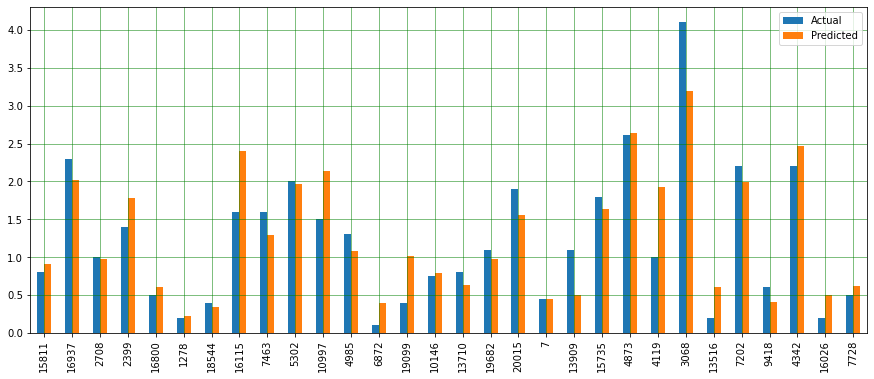

In [13]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(15,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [15]:
from sklearn.metrics import r2_score
score= r2_score(testY,Y_pred)
score

0.7598041262672589

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, Y_pred)))

Mean Absolute Error: 0.3369881817532481
Mean Squared Error: 0.261033872745623
Root Mean Squared Error: 0.5109147411707975
